# Example: WeightedSHAP on the fraud dataset

- In this notebook, we introduce weightedSHAP, which provides a generalized feature attribution method.

In [1]:
import sys, os
import numpy as np
import pickle 
np.random.seed(2022)
from analysis_utils import *

sys.path.append('../weightedSHAP')
import data, train, weightedSHAPEngine

## Load data
- We use the fraud dataset (https://www.openml.org/search?type=data&status=active&id=42397).
- A function `data.load_data` will load the `train`, `val`, `est`, and `test` datasets. 
 - `train`: to train a model to explain
 - `val`: to optimize hyperparameters
 - `est`: to estimate coalition functions
 - `test`: to evaluate the quality of feature attributions 

In [2]:
# Load dataset
problem='classification' 
dataset='fraud'
ML_model='boosting' 
(X_train, y_train), (X_val, y_val), (X_est, y_est), (X_test, y_test)=data.load_data(problem, dataset)    

------------------------------
Load a dataset
------------------------------
--------------------------------------------------
Fraud Detection
--------------------------------------------------
------------------------------
Before adding noise
Shape of X_train, X_val, X_est, X_test: (13310, 30), (1902, 30), (1902, 30), (1902, 30)
------------------------------
Rho: 0.0388
After adding noise
Shape of X_train, X_val, X_est, X_test: (13310, 90), (1902, 90), (1902, 90), (1902, 90)
------------------------------


## Train a model to explain
 - This step is a typical routine in machine learning. Given training and validation datasets, we train a model. Our goal is to interpret this model by looking a particular prediction (i.e., a local attribution problem).

In [3]:
model_to_explain=train.create_model_to_explain(X_train, y_train, X_val, y_val, problem, ML_model)

------------------------------
Train a model
Train a model to explain: Boosting
Training until validation scores don't improve for 25 rounds
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.646885	valid_0's binary_error: 0.0320715
Elapsed time for training a model to explain: 1.21 seconds
------------------------------


## Compute attributions and evaluate its performance
- `weightedSHAPEngine.run_attribution_core` computes conditional expectation values $\mathbb{E}[f(X) \mid X_S = x_S]$ based on various weighted versions $\phi_\mathbf{w} (x_i) := \sum_{j=1} ^{d} w_j \Delta_{j}(x_i)$ of SHAP (Equation (5) of the paper). We consider a set $\mathcal{W}$ which includes SHAP as well.
- We store them in `exp_dict` which includes
 - `cond_pred_keep_absolute` (add features with large absolute values first)
 - `cond_pred_remove_absolute` (remove features with large absolute values first)
 - `pred_masking` (add features with large absolute values first and other featuers are masked with zero).

In [4]:
if not os.path.exists('fraud_example.pickle'):
    # Train a surrogate model and generate a coalition function
    # To efficiently estimate a conditional coalition function, we train a surrogate model. 
    conditional_extension=train.generate_coalition_function(model_to_explain, X_train, X_est, problem, ML_model)
    
    # With a surrogate model, we compute conditional expectations
    exp_dict=weightedSHAPEngine.run_attribution_core(problem, ML_model,
                                                     model_to_explain, conditional_extension,
                                                     X_train, y_train,
                                                     X_val, y_val, 
                                                     X_test, y_test)

    with open('fraud_example.pickle', 'wb') as handle:
        pickle.dump(exp_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
else:
    with open('fraud_example.pickle', 'rb') as handle:
        exp_dict = pickle.load(handle)


Elapsed time for training a surrogate model: 527.47 seconds


  0%|                                                                                                                | 0/100 [00:00<?, ?it/s]

Total number of random sets: 900, GR_stat: 1.0044481225297783
MCI score: 8993, Therehosld: 8991
We have seen 1000 random subsets for each feature.


  1%|█                                                                                                       | 1/100 [00:25<42:46, 25.92s/it]

Total number of random sets: 1000, GR_stat: 1.0102558569524647
Total number of random sets: 1100, GR_stat: 1.0074160922051987
Total number of random sets: 1200, GR_stat: 1.008655035366421
Total number of random sets: 1300, GR_stat: 1.0063212384785707
Total number of random sets: 1400, GR_stat: 1.0061500413389084
Total number of random sets: 1600, GR_stat: 1.005908302141378
Total number of random sets: 1700, GR_stat: 1.0041591841727189
MCI score: 8995, Therehosld: 8991
We have seen 1800 random subsets for each feature.


  2%|██                                                                                                    | 2/100 [01:14<1:03:43, 39.02s/it]

Total number of random sets: 500, GR_stat: 1.0163095169574239
Total number of random sets: 1000, GR_stat: 1.0077326128040351
Total number of random sets: 1300, GR_stat: 1.0057636410103268
Total number of random sets: 1400, GR_stat: 1.0057137346730483
Total number of random sets: 1500, GR_stat: 1.005533623884607
Total number of random sets: 1600, GR_stat: 1.0028695002518269
MCI score: 8994, Therehosld: 8991
We have seen 1700 random subsets for each feature.


  3%|███                                                                                                   | 3/100 [02:01<1:09:00, 42.69s/it]

Total number of random sets: 1100, GR_stat: 1.007537805616862
Total number of random sets: 1300, GR_stat: 1.0097895252454514
Total number of random sets: 1400, GR_stat: 1.0071102232971398
Total number of random sets: 1500, GR_stat: 1.0066231163509478
Total number of random sets: 1600, GR_stat: 1.0058451299193336
Total number of random sets: 1700, GR_stat: 1.0049397066816688
MCI score: 8995, Therehosld: 8991
We have seen 1800 random subsets for each feature.


  4%|████                                                                                                  | 4/100 [02:48<1:10:57, 44.34s/it]

Total number of random sets: 700, GR_stat: 1.0129614485568346
Total number of random sets: 1000, GR_stat: 1.0069803259252674
Total number of random sets: 1100, GR_stat: 1.003825994922321
MCI score: 8998, Therehosld: 8991
We have seen 1200 random subsets for each feature.


  5%|█████                                                                                                 | 5/100 [03:18<1:02:26, 39.43s/it]

Total number of random sets: 900, GR_stat: 1.0121055740534584
Total number of random sets: 1300, GR_stat: 1.0075818222030157
Total number of random sets: 1400, GR_stat: 1.0042180086337975
MCI score: 8996, Therehosld: 8991
We have seen 1500 random subsets for each feature.


  6%|██████                                                                                                | 6/100 [03:57<1:01:37, 39.34s/it]

Total number of random sets: 1000, GR_stat: 1.0067372087682689
Total number of random sets: 1200, GR_stat: 1.0047269236931053
MCI score: 8992, Therehosld: 8991
We have seen 1300 random subsets for each feature.


  7%|███████▎                                                                                                | 7/100 [04:31<58:06, 37.49s/it]

Total number of random sets: 1100, GR_stat: 1.0056031880385425
Total number of random sets: 1300, GR_stat: 1.0048167678980615
MCI score: 8992, Therehosld: 8991
We have seen 1400 random subsets for each feature.


  8%|████████▎                                                                                               | 8/100 [05:07<56:45, 37.02s/it]

Total number of random sets: 900, GR_stat: 1.0039283340513974
MCI score: 8993, Therehosld: 8991
We have seen 1000 random subsets for each feature.


  9%|█████████▎                                                                                              | 9/100 [05:32<50:34, 33.34s/it]

Total number of random sets: 1100, GR_stat: 1.0088069005196427
Total number of random sets: 1200, GR_stat: 1.0109575981412975
Total number of random sets: 1300, GR_stat: 1.0108422602798748
Total number of random sets: 1400, GR_stat: 1.0067363181592395
Total number of random sets: 1500, GR_stat: 1.0063427679837251
Total number of random sets: 1600, GR_stat: 1.0080387453808237
Total number of random sets: 1700, GR_stat: 1.0070187547714724
Total number of random sets: 1800, GR_stat: 1.0078350972638002
Total number of random sets: 1900, GR_stat: 1.0078990726504793
Total number of random sets: 2000, GR_stat: 1.008705076994871
Total number of random sets: 2100, GR_stat: 1.0070270901335705
Total number of random sets: 2200, GR_stat: 1.0066545428158322
Total number of random sets: 2300, GR_stat: 1.0059169955302456
Total number of random sets: 2400, GR_stat: 1.0074335362704787
Total number of random sets: 2500, GR_stat: 1.004683666708194
MCI score: 8997, Therehosld: 8991
We have seen 2600 rando

 10%|██████████                                                                                           | 10/100 [06:42<1:06:38, 44.43s/it]

Total number of random sets: 900, GR_stat: 1.0073943967325434
Total number of random sets: 1100, GR_stat: 1.0070611466155788
Total number of random sets: 1200, GR_stat: 1.005868538037139
Total number of random sets: 1300, GR_stat: 1.007096443920144
Total number of random sets: 1500, GR_stat: 1.0056325780827242
Total number of random sets: 1700, GR_stat: 1.0041322092559037
MCI score: 8997, Therehosld: 8991
We have seen 1800 random subsets for each feature.


 11%|███████████                                                                                          | 11/100 [07:29<1:07:19, 45.38s/it]

Total number of random sets: 1100, GR_stat: 1.0086440081050232
Total number of random sets: 1400, GR_stat: 1.004852536585263
MCI score: 8995, Therehosld: 8991
We have seen 1500 random subsets for each feature.


 12%|████████████                                                                                         | 12/100 [08:09<1:03:59, 43.63s/it]

Total number of random sets: 1200, GR_stat: 1.0041877425909496
MCI score: 8998, Therehosld: 8991
We have seen 1300 random subsets for each feature.


 13%|█████████████▍                                                                                         | 13/100 [08:43<59:17, 40.89s/it]

Total number of random sets: 1000, GR_stat: 1.00916319534759
Total number of random sets: 1100, GR_stat: 1.0051711761235942
Total number of random sets: 1200, GR_stat: 1.0044004677502236
MCI score: 8995, Therehosld: 8991
We have seen 1300 random subsets for each feature.


 14%|██████████████▍                                                                                        | 14/100 [09:17<55:39, 38.83s/it]

Total number of random sets: 900, GR_stat: 1.008807840415017
Total number of random sets: 1300, GR_stat: 1.009039127882593
Total number of random sets: 1400, GR_stat: 1.007041359426327
Total number of random sets: 1500, GR_stat: 1.004947944828726
MCI score: 8993, Therehosld: 8991
We have seen 1600 random subsets for each feature.


 15%|███████████████▍                                                                                       | 15/100 [10:00<56:45, 40.07s/it]

Total number of random sets: 1000, GR_stat: 1.0051914986606003
Total number of random sets: 1300, GR_stat: 1.0049432824362792
MCI score: 8994, Therehosld: 8991
We have seen 1400 random subsets for each feature.


 16%|████████████████▍                                                                                      | 16/100 [10:38<55:12, 39.43s/it]

Total number of random sets: 900, GR_stat: 1.00764162885721
Total number of random sets: 1300, GR_stat: 1.0063666849148758
Total number of random sets: 1400, GR_stat: 1.0050069327147393
Total number of random sets: 1500, GR_stat: 1.0033912771693596
MCI score: 8997, Therehosld: 8991
We have seen 1600 random subsets for each feature.


 17%|█████████████████▌                                                                                     | 17/100 [11:23<56:53, 41.12s/it]

Total number of random sets: 800, GR_stat: 1.0104090310537186
Total number of random sets: 900, GR_stat: 1.009577222410384
Total number of random sets: 1300, GR_stat: 1.0047021240276328
MCI score: 8998, Therehosld: 8991
We have seen 1400 random subsets for each feature.


 18%|██████████████████▌                                                                                    | 18/100 [12:00<54:23, 39.80s/it]

Total number of random sets: 600, GR_stat: 1.0128345602974922
Total number of random sets: 1200, GR_stat: 1.004647941402032
MCI score: 8996, Therehosld: 8991
We have seen 1300 random subsets for each feature.


 19%|███████████████████▌                                                                                   | 19/100 [12:34<51:15, 37.97s/it]

Total number of random sets: 1000, GR_stat: 1.0141887285756508
Total number of random sets: 1100, GR_stat: 1.006981123019112
Total number of random sets: 1400, GR_stat: 1.0075119718761651
Total number of random sets: 1500, GR_stat: 1.0044670950292958
MCI score: 8992, Therehosld: 8991
We have seen 1600 random subsets for each feature.


 20%|████████████████████▌                                                                                  | 20/100 [13:16<52:07, 39.09s/it]

Total number of random sets: 1100, GR_stat: 1.0057166369136559
Total number of random sets: 1200, GR_stat: 1.0055963734277726
Total number of random sets: 1400, GR_stat: 1.0040088810443757
MCI score: 8995, Therehosld: 8991
We have seen 1500 random subsets for each feature.


 21%|█████████████████████▋                                                                                 | 21/100 [13:57<52:20, 39.75s/it]

Total number of random sets: 900, GR_stat: 1.0106807489522922
Total number of random sets: 1000, GR_stat: 1.0065016731282717
Total number of random sets: 1200, GR_stat: 1.0066290735204293
Total number of random sets: 1300, GR_stat: 1.008592471456618
Total number of random sets: 1400, GR_stat: 1.0055273538146696
Total number of random sets: 1500, GR_stat: 1.0065703684802345
Total number of random sets: 1600, GR_stat: 1.0068706589416965
Total number of random sets: 1800, GR_stat: 1.005007664897396
Total number of random sets: 1900, GR_stat: 1.0039603319606667
MCI score: 8997, Therehosld: 8991
We have seen 2000 random subsets for each feature.


 22%|██████████████████████▋                                                                                | 22/100 [14:50<56:51, 43.73s/it]

Total number of random sets: 1000, GR_stat: 1.0064546357631465
Total number of random sets: 1100, GR_stat: 1.0057191221141624
Total number of random sets: 1300, GR_stat: 1.003612146173081
MCI score: 8994, Therehosld: 8991
We have seen 1400 random subsets for each feature.


 23%|███████████████████████▋                                                                               | 23/100 [15:29<54:12, 42.25s/it]

Total number of random sets: 800, GR_stat: 1.0079515058084563
Total number of random sets: 1000, GR_stat: 1.0115520616687976
Total number of random sets: 1200, GR_stat: 1.009557789224087
Total number of random sets: 1300, GR_stat: 1.0077647436300712
Total number of random sets: 1600, GR_stat: 1.0059917916798926
Total number of random sets: 1800, GR_stat: 1.0050048053576626
Total number of random sets: 2000, GR_stat: 1.0033019740716334
MCI score: 8997, Therehosld: 8991
We have seen 2100 random subsets for each feature.


 24%|████████████████████████▏                                                                            | 24/100 [16:30<1:00:40, 47.90s/it]

Total number of random sets: 1100, GR_stat: 1.0061177109955217
Total number of random sets: 1200, GR_stat: 1.0046811122922208
MCI score: 8996, Therehosld: 8991
We have seen 1300 random subsets for each feature.


 25%|█████████████████████████▊                                                                             | 25/100 [17:07<55:45, 44.61s/it]

Total number of random sets: 800, GR_stat: 1.0066004321787703
Total number of random sets: 1000, GR_stat: 1.0075254079858549
Total number of random sets: 1200, GR_stat: 1.0072294978488503
Total number of random sets: 1300, GR_stat: 1.0057368940142075
Total number of random sets: 1400, GR_stat: 1.0064376946989482
Total number of random sets: 1500, GR_stat: 1.0045975881782803
MCI score: 8996, Therehosld: 8991
We have seen 1600 random subsets for each feature.


 26%|██████████████████████████▊                                                                            | 26/100 [17:53<55:35, 45.07s/it]

Total number of random sets: 600, GR_stat: 1.0109414650270536
Total number of random sets: 900, GR_stat: 1.0069327841314861
Total number of random sets: 1500, GR_stat: 1.0040756135268596
MCI score: 8993, Therehosld: 8991
We have seen 1600 random subsets for each feature.


 27%|███████████████████████████▊                                                                           | 27/100 [18:39<55:09, 45.33s/it]

Total number of random sets: 1100, GR_stat: 1.0046778965865621
MCI score: 8992, Therehosld: 8991
We have seen 1200 random subsets for each feature.


 28%|████████████████████████████▊                                                                          | 28/100 [19:13<50:18, 41.92s/it]

Total number of random sets: 900, GR_stat: 1.005335069833249
Total number of random sets: 1100, GR_stat: 1.0042613699655698
MCI score: 8993, Therehosld: 8991
We have seen 1200 random subsets for each feature.


 29%|█████████████████████████████▊                                                                         | 29/100 [19:47<46:47, 39.55s/it]

Total number of random sets: 1000, GR_stat: 1.0100657782862619
Total number of random sets: 1200, GR_stat: 1.0049861350534421
MCI score: 8992, Therehosld: 8991
We have seen 1300 random subsets for each feature.


 30%|██████████████████████████████▉                                                                        | 30/100 [20:24<45:15, 38.79s/it]

Total number of random sets: 900, GR_stat: 1.0055734910163079
Total number of random sets: 1100, GR_stat: 1.0072357047014102
Total number of random sets: 1300, GR_stat: 1.006737897606606
Total number of random sets: 1400, GR_stat: 1.0066811196814807
Total number of random sets: 1500, GR_stat: 1.0037460301929062
MCI score: 8998, Therehosld: 8991
We have seen 1600 random subsets for each feature.


 31%|███████████████████████████████▉                                                                       | 31/100 [21:10<47:06, 40.96s/it]

Total number of random sets: 800, GR_stat: 1.0128300392542124
Total number of random sets: 900, GR_stat: 1.013219232665488
Total number of random sets: 1000, GR_stat: 1.0107768168565767
Total number of random sets: 1200, GR_stat: 1.0059487346106035
Total number of random sets: 1300, GR_stat: 1.0074779171770747
Total number of random sets: 1400, GR_stat: 1.004863553298431
MCI score: 8994, Therehosld: 8991
We have seen 1500 random subsets for each feature.


 32%|████████████████████████████████▉                                                                      | 32/100 [21:53<47:11, 41.64s/it]

Total number of random sets: 1000, GR_stat: 1.0070362075373218
Total number of random sets: 1300, GR_stat: 1.005590248715996
Total number of random sets: 1500, GR_stat: 1.004276546795165
MCI score: 9000, Therehosld: 8991
We have seen 1600 random subsets for each feature.


 33%|█████████████████████████████████▉                                                                     | 33/100 [22:39<47:58, 42.97s/it]

Total number of random sets: 900, GR_stat: 1.0054346658720337
Total number of random sets: 1100, GR_stat: 1.0070041677824928
Total number of random sets: 1500, GR_stat: 1.0034465618901731
MCI score: 8992, Therehosld: 8991
We have seen 1600 random subsets for each feature.


 34%|███████████████████████████████████                                                                    | 34/100 [23:25<48:18, 43.91s/it]

Total number of random sets: 800, GR_stat: 1.0140007688203232
Total number of random sets: 1000, GR_stat: 1.006555087634423
Total number of random sets: 1100, GR_stat: 1.0045008337498678
MCI score: 8995, Therehosld: 8991
We have seen 1200 random subsets for each feature.


 35%|████████████████████████████████████                                                                   | 35/100 [23:59<44:22, 40.97s/it]

Total number of random sets: 1000, GR_stat: 1.006624879063219
Total number of random sets: 1100, GR_stat: 1.008065430621247
Total number of random sets: 1200, GR_stat: 1.0070569627872823
Total number of random sets: 1400, GR_stat: 1.0049284694054266
MCI score: 8992, Therehosld: 8991
We have seen 1500 random subsets for each feature.


 36%|█████████████████████████████████████                                                                  | 36/100 [24:42<44:23, 41.61s/it]

Total number of random sets: 900, GR_stat: 1.0078675014973795
Total number of random sets: 1200, GR_stat: 1.0076672414058068
Total number of random sets: 1300, GR_stat: 1.0064354907396365
Total number of random sets: 1600, GR_stat: 1.0052223558632543
Total number of random sets: 1700, GR_stat: 1.005095116691244
Total number of random sets: 1800, GR_stat: 1.00393456407714
MCI score: 8993, Therehosld: 8991
We have seen 1900 random subsets for each feature.


 37%|██████████████████████████████████████                                                                 | 37/100 [25:37<47:56, 45.65s/it]

Total number of random sets: 900, GR_stat: 1.0090151813915036
Total number of random sets: 1200, GR_stat: 1.0047550427490493
MCI score: 8993, Therehosld: 8991
We have seen 1300 random subsets for each feature.


 38%|███████████████████████████████████████▏                                                               | 38/100 [26:15<44:30, 43.07s/it]

Total number of random sets: 1100, GR_stat: 1.0053209653688533
Total number of random sets: 1200, GR_stat: 1.006896753366532
Total number of random sets: 1400, GR_stat: 1.006713174394029
Total number of random sets: 1500, GR_stat: 1.0052295920555787
Total number of random sets: 1600, GR_stat: 1.0052178216978378
Total number of random sets: 1800, GR_stat: 1.0057214456913028
Total number of random sets: 1900, GR_stat: 1.0057141301964463
Total number of random sets: 2000, GR_stat: 1.0036650462482697
MCI score: 8995, Therehosld: 8991
We have seen 2100 random subsets for each feature.


 39%|████████████████████████████████████████▏                                                              | 39/100 [27:16<49:19, 48.51s/it]

Total number of random sets: 1000, GR_stat: 1.0063766740264017
Total number of random sets: 1200, GR_stat: 1.0056766749362498
Total number of random sets: 1300, GR_stat: 1.0057291336966163
Total number of random sets: 1400, GR_stat: 1.004271972561659
MCI score: 8994, Therehosld: 8991
We have seen 1500 random subsets for each feature.


 40%|█████████████████████████████████████████▏                                                             | 40/100 [27:59<46:55, 46.92s/it]

Total number of random sets: 1100, GR_stat: 1.0047180104493543
MCI score: 8995, Therehosld: 8991
We have seen 1200 random subsets for each feature.


 41%|██████████████████████████████████████████▏                                                            | 41/100 [28:33<42:19, 43.04s/it]

Total number of random sets: 800, GR_stat: 1.0093354955782572
Total number of random sets: 1000, GR_stat: 1.0057356230951604
Total number of random sets: 1100, GR_stat: 1.0037797386575058
MCI score: 8992, Therehosld: 8991
We have seen 1200 random subsets for each feature.


 42%|███████████████████████████████████████████▎                                                           | 42/100 [29:07<38:58, 40.32s/it]

Total number of random sets: 1000, GR_stat: 1.0093877682492611
Total number of random sets: 1100, GR_stat: 1.0078933102781082
Total number of random sets: 1200, GR_stat: 1.0056420169113818
Total number of random sets: 1300, GR_stat: 1.0087574342952057
Total number of random sets: 1400, GR_stat: 1.0044338381826694
MCI score: 8996, Therehosld: 8991
We have seen 1500 random subsets for each feature.


 43%|████████████████████████████████████████████▎                                                          | 43/100 [29:50<39:06, 41.17s/it]

Total number of random sets: 900, GR_stat: 1.0119841227859199
Total number of random sets: 1000, GR_stat: 1.0078779354648038
Total number of random sets: 1100, GR_stat: 1.0076607955284196
Total number of random sets: 1200, GR_stat: 1.0049612683811946
MCI score: 8993, Therehosld: 8991
We have seen 1300 random subsets for each feature.


 44%|█████████████████████████████████████████████▎                                                         | 44/100 [30:27<37:16, 39.93s/it]

Total number of random sets: 1000, GR_stat: 1.0052811585536783
Total number of random sets: 1200, GR_stat: 1.0039163812595493
MCI score: 8993, Therehosld: 8991
We have seen 1300 random subsets for each feature.


 45%|██████████████████████████████████████████████▎                                                        | 45/100 [31:04<35:50, 39.10s/it]

Total number of random sets: 1100, GR_stat: 1.0086039679311227
Total number of random sets: 1300, GR_stat: 1.0049826543686051
MCI score: 8992, Therehosld: 8991
We have seen 1400 random subsets for each feature.


 46%|███████████████████████████████████████████████▍                                                       | 46/100 [31:44<35:28, 39.42s/it]

Total number of random sets: 1000, GR_stat: 1.0058390505084347
Total number of random sets: 1200, GR_stat: 1.007552809102338
Total number of random sets: 1300, GR_stat: 1.0065631899146075
Total number of random sets: 1400, GR_stat: 1.0057478686512473
Total number of random sets: 1600, GR_stat: 1.0052168053300816
Total number of random sets: 1700, GR_stat: 1.0051266134562757
Total number of random sets: 1800, GR_stat: 1.004773957972231
MCI score: 8997, Therehosld: 8991
We have seen 1900 random subsets for each feature.


 47%|████████████████████████████████████████████████▍                                                      | 47/100 [32:40<39:02, 44.20s/it]

Total number of random sets: 1000, GR_stat: 1.004719196279967
MCI score: 8992, Therehosld: 8991
We have seen 1100 random subsets for each feature.


 48%|█████████████████████████████████████████████████▍                                                     | 48/100 [33:11<34:54, 40.28s/it]

Total number of random sets: 1200, GR_stat: 1.0052060198051977
Total number of random sets: 1400, GR_stat: 1.0057772796979327
Total number of random sets: 1500, GR_stat: 1.0061369238465345
Total number of random sets: 1600, GR_stat: 1.0045724291319682
MCI score: 9000, Therehosld: 8991
We have seen 1700 random subsets for each feature.


 49%|██████████████████████████████████████████████████▍                                                    | 49/100 [34:00<36:31, 42.98s/it]

Total number of random sets: 800, GR_stat: 1.0046416597074337
MCI score: 8993, Therehosld: 8991
We have seen 900 random subsets for each feature.


 50%|███████████████████████████████████████████████████▌                                                   | 50/100 [34:25<31:20, 37.62s/it]

Total number of random sets: 1100, GR_stat: 1.0096101506353625
Total number of random sets: 1200, GR_stat: 1.01047285422517
Total number of random sets: 1300, GR_stat: 1.0036472446775884
MCI score: 8993, Therehosld: 8991
We have seen 1400 random subsets for each feature.


 51%|████████████████████████████████████████████████████▌                                                  | 51/100 [35:05<31:20, 38.38s/it]

Total number of random sets: 1000, GR_stat: 1.008657591160281
Total number of random sets: 1200, GR_stat: 1.0049326957331912
MCI score: 8992, Therehosld: 8991
We have seen 1300 random subsets for each feature.


 52%|█████████████████████████████████████████████████████▌                                                 | 52/100 [35:43<30:26, 38.05s/it]

Total number of random sets: 900, GR_stat: 1.00735866381231
Total number of random sets: 1100, GR_stat: 1.0056540922312776
Total number of random sets: 1300, GR_stat: 1.0046762850536175
MCI score: 8996, Therehosld: 8991
We have seen 1400 random subsets for each feature.


 53%|██████████████████████████████████████████████████████▌                                                | 53/100 [36:23<30:18, 38.70s/it]

Total number of random sets: 1100, GR_stat: 1.0072291928884278
Total number of random sets: 1200, GR_stat: 1.0070321067001857
Total number of random sets: 1300, GR_stat: 1.0042779292195365
MCI score: 8993, Therehosld: 8991
We have seen 1400 random subsets for each feature.


 54%|███████████████████████████████████████████████████████▌                                               | 54/100 [37:03<30:01, 39.16s/it]

Total number of random sets: 1100, GR_stat: 1.0064163971218505
Total number of random sets: 1300, GR_stat: 1.0102742723463514
Total number of random sets: 1400, GR_stat: 1.0073444276212393
Total number of random sets: 1600, GR_stat: 1.0042484020473819
MCI score: 8993, Therehosld: 8991
We have seen 1700 random subsets for each feature.


 55%|████████████████████████████████████████████████████████▋                                              | 55/100 [37:52<31:38, 42.18s/it]

Total number of random sets: 1000, GR_stat: 1.0090263173777572
Total number of random sets: 1100, GR_stat: 1.0115498890663757
Total number of random sets: 1200, GR_stat: 1.0071741949012616
Total number of random sets: 1300, GR_stat: 1.0060213703485126
Total number of random sets: 1500, GR_stat: 1.0057906183597156
Total number of random sets: 1600, GR_stat: 1.0054017748844102
Total number of random sets: 1700, GR_stat: 1.0026156612563062
MCI score: 8994, Therehosld: 8991
We have seen 1800 random subsets for each feature.


 56%|█████████████████████████████████████████████████████████▋                                             | 56/100 [38:45<33:10, 45.23s/it]

Total number of random sets: 700, GR_stat: 1.0133915160200955
Total number of random sets: 900, GR_stat: 1.0071733464921147
Total number of random sets: 1000, GR_stat: 1.0051084601629667
Total number of random sets: 1100, GR_stat: 1.0064551303200007
Total number of random sets: 1200, GR_stat: 1.007783906431058
Total number of random sets: 1500, GR_stat: 1.005854915686357
Total number of random sets: 1600, GR_stat: 1.0040790882074044
MCI score: 8993, Therehosld: 8991
We have seen 1700 random subsets for each feature.


 57%|██████████████████████████████████████████████████████████▋                                            | 57/100 [39:34<33:19, 46.50s/it]

Total number of random sets: 900, GR_stat: 1.0061673629270314
Total number of random sets: 1000, GR_stat: 1.0043262714023382
MCI score: 8992, Therehosld: 8991
We have seen 1100 random subsets for each feature.


 58%|███████████████████████████████████████████████████████████▋                                           | 58/100 [40:05<29:21, 41.94s/it]

Total number of random sets: 1100, GR_stat: 1.0066947476340913
Total number of random sets: 1200, GR_stat: 1.0072992661876883
Total number of random sets: 1300, GR_stat: 1.00569485941703
Total number of random sets: 1400, GR_stat: 1.004795997530395
MCI score: 8995, Therehosld: 8991
We have seen 1500 random subsets for each feature.


 59%|████████████████████████████████████████████████████████████▊                                          | 59/100 [40:49<28:57, 42.37s/it]

Total number of random sets: 800, GR_stat: 1.0113860092661386
Total number of random sets: 1100, GR_stat: 1.007015312858583
Total number of random sets: 1200, GR_stat: 1.0054776590358454
Total number of random sets: 1500, GR_stat: 1.0052739261035402
Total number of random sets: 1600, GR_stat: 1.0068566893693098
Total number of random sets: 1700, GR_stat: 1.0042492206492943
MCI score: 8998, Therehosld: 8991
We have seen 1800 random subsets for each feature.


 60%|█████████████████████████████████████████████████████████████▊                                         | 60/100 [41:41<30:16, 45.42s/it]

Total number of random sets: 1000, GR_stat: 1.0058054534250649
Total number of random sets: 1200, GR_stat: 1.0054766652538298
Total number of random sets: 1500, GR_stat: 1.0049856944662445
MCI score: 8995, Therehosld: 8991
We have seen 1600 random subsets for each feature.


 61%|██████████████████████████████████████████████████████████████▊                                        | 61/100 [42:28<29:42, 45.71s/it]

Total number of random sets: 1100, GR_stat: 1.006502178554916
Total number of random sets: 1300, GR_stat: 1.0048814451445818
MCI score: 8994, Therehosld: 8991
We have seen 1400 random subsets for each feature.


 62%|███████████████████████████████████████████████████████████████▊                                       | 62/100 [43:08<27:55, 44.09s/it]

Total number of random sets: 1000, GR_stat: 1.0065375264400336
Total number of random sets: 1200, GR_stat: 1.0049924583183198
MCI score: 8994, Therehosld: 8991
We have seen 1300 random subsets for each feature.


 63%|████████████████████████████████████████████████████████████████▉                                      | 63/100 [43:46<25:58, 42.12s/it]

Total number of random sets: 900, GR_stat: 1.007553211852076
Total number of random sets: 1100, GR_stat: 1.0064395810849676
Total number of random sets: 1200, GR_stat: 1.0050029398751665
Total number of random sets: 1300, GR_stat: 1.0050705172049612
Total number of random sets: 1500, GR_stat: 1.0034823195882487
MCI score: 8996, Therehosld: 8991
We have seen 1600 random subsets for each feature.


 64%|█████████████████████████████████████████████████████████████████▉                                     | 64/100 [44:32<26:03, 43.42s/it]

Total number of random sets: 800, GR_stat: 1.007730949217636
Total number of random sets: 1000, GR_stat: 1.0063519620489718
Total number of random sets: 1100, GR_stat: 1.004456852689392
MCI score: 8992, Therehosld: 8991
We have seen 1200 random subsets for each feature.


 65%|██████████████████████████████████████████████████████████████████▉                                    | 65/100 [45:06<23:43, 40.67s/it]

Total number of random sets: 1000, GR_stat: 1.005592433637502
Total number of random sets: 1200, GR_stat: 1.006222416088397
Total number of random sets: 1300, GR_stat: 1.0052922688258976
Total number of random sets: 1400, GR_stat: 1.0047093090122443
MCI score: 8992, Therehosld: 8991
We have seen 1500 random subsets for each feature.


 66%|███████████████████████████████████████████████████████████████████▉                                   | 66/100 [45:50<23:31, 41.50s/it]

Total number of random sets: 1000, GR_stat: 1.0074490555635232
Total number of random sets: 1100, GR_stat: 1.0078441086691958
Total number of random sets: 1500, GR_stat: 1.0050119115482898
Total number of random sets: 1600, GR_stat: 1.0040638329573524
MCI score: 8998, Therehosld: 8991
We have seen 1700 random subsets for each feature.


 67%|█████████████████████████████████████████████████████████████████████                                  | 67/100 [46:39<24:08, 43.88s/it]

Total number of random sets: 700, GR_stat: 1.009253277399912
Total number of random sets: 1000, GR_stat: 1.0064589204754237
Total number of random sets: 1100, GR_stat: 1.008127336535541
Total number of random sets: 1500, GR_stat: 1.00456827739429
MCI score: 8992, Therehosld: 8991
We have seen 1600 random subsets for each feature.


 68%|██████████████████████████████████████████████████████████████████████                                 | 68/100 [47:26<23:48, 44.64s/it]

Total number of random sets: 800, GR_stat: 1.0106189567104737
Total number of random sets: 900, GR_stat: 1.0081206826274838
Total number of random sets: 1300, GR_stat: 1.00778083199144
Total number of random sets: 1400, GR_stat: 1.0040154209747498
MCI score: 8998, Therehosld: 8991
We have seen 1500 random subsets for each feature.


 69%|███████████████████████████████████████████████████████████████████████                                | 69/100 [48:09<22:49, 44.19s/it]

Total number of random sets: 700, GR_stat: 1.0129285700167243
Total number of random sets: 900, GR_stat: 1.006648420080034
Total number of random sets: 1200, GR_stat: 1.0061191230100834
Total number of random sets: 1400, GR_stat: 1.004117603183246
MCI score: 8992, Therehosld: 8991
We have seen 1500 random subsets for each feature.


 70%|████████████████████████████████████████████████████████████████████████                               | 70/100 [48:52<21:57, 43.93s/it]

Total number of random sets: 800, GR_stat: 1.0092645549148556
Total number of random sets: 900, GR_stat: 1.006312059698942
Total number of random sets: 1000, GR_stat: 1.0075804890298656
Total number of random sets: 1100, GR_stat: 1.0071701947224954
Total number of random sets: 1200, GR_stat: 1.0038785945900799
MCI score: 8993, Therehosld: 8991
We have seen 1300 random subsets for each feature.


 71%|█████████████████████████████████████████████████████████████████████████▏                             | 71/100 [49:29<20:17, 41.97s/it]

Total number of random sets: 1200, GR_stat: 1.005627606085784
Total number of random sets: 1500, GR_stat: 1.0049010054893257
MCI score: 8995, Therehosld: 8991
We have seen 1600 random subsets for each feature.


 72%|██████████████████████████████████████████████████████████████████████████▏                            | 72/100 [50:16<20:11, 43.28s/it]

Total number of random sets: 1100, GR_stat: 1.0059889767950503
Total number of random sets: 1200, GR_stat: 1.0075443392217758
Total number of random sets: 1400, GR_stat: 1.0049653445939186
MCI score: 8995, Therehosld: 8991
We have seen 1500 random subsets for each feature.


 73%|███████████████████████████████████████████████████████████████████████████▏                           | 73/100 [50:59<19:28, 43.27s/it]

Total number of random sets: 800, GR_stat: 1.0062206935622553
Total number of random sets: 1100, GR_stat: 1.0093634734968469
Total number of random sets: 1300, GR_stat: 1.007748074470051
Total number of random sets: 1400, GR_stat: 1.0035260841122822
MCI score: 8992, Therehosld: 8991
We have seen 1500 random subsets for each feature.


 74%|████████████████████████████████████████████████████████████████████████████▏                          | 74/100 [51:42<18:46, 43.32s/it]

Total number of random sets: 800, GR_stat: 1.0099217474374167
Total number of random sets: 900, GR_stat: 1.007667731612657
Total number of random sets: 1000, GR_stat: 1.0070472616985249
Total number of random sets: 1200, GR_stat: 1.0052387380406655
Total number of random sets: 1300, GR_stat: 1.007744695014633
Total number of random sets: 1400, GR_stat: 1.0068291654887298
Total number of random sets: 1500, GR_stat: 1.0068628465686382
Total number of random sets: 1600, GR_stat: 1.0048415028312365
MCI score: 8996, Therehosld: 8991
We have seen 1700 random subsets for each feature.


 75%|█████████████████████████████████████████████████████████████████████████████▎                         | 75/100 [52:34<19:02, 45.68s/it]

Total number of random sets: 900, GR_stat: 1.0086816803265486
Total number of random sets: 1200, GR_stat: 1.0047161905491506
MCI score: 8995, Therehosld: 8991
We have seen 1300 random subsets for each feature.


 76%|██████████████████████████████████████████████████████████████████████████████▎                        | 76/100 [53:11<17:14, 43.11s/it]

Total number of random sets: 1000, GR_stat: 1.0062915674952215
Total number of random sets: 1100, GR_stat: 1.0046757228124272
MCI score: 8994, Therehosld: 8991
We have seen 1200 random subsets for each feature.


 77%|███████████████████████████████████████████████████████████████████████████████▎                       | 77/100 [53:45<15:29, 40.43s/it]

Total number of random sets: 1100, GR_stat: 1.0109278217450002
Total number of random sets: 1200, GR_stat: 1.0056035334481297
Total number of random sets: 1300, GR_stat: 1.0080254325631723
Total number of random sets: 1400, GR_stat: 1.005246513333484
Total number of random sets: 1500, GR_stat: 1.0057769449039415
Total number of random sets: 1700, GR_stat: 1.005861769681616
Total number of random sets: 1800, GR_stat: 1.0039047333058941
MCI score: 8998, Therehosld: 8991
We have seen 1900 random subsets for each feature.


 78%|████████████████████████████████████████████████████████████████████████████████▎                      | 78/100 [54:41<16:30, 45.03s/it]

Total number of random sets: 800, GR_stat: 1.0069728499463206
Total number of random sets: 900, GR_stat: 1.0124981423911867
Total number of random sets: 1000, GR_stat: 1.0048831200538573
MCI score: 8992, Therehosld: 8991
We have seen 1100 random subsets for each feature.


 79%|█████████████████████████████████████████████████████████████████████████████████▎                     | 79/100 [55:12<14:21, 41.04s/it]

Total number of random sets: 1100, GR_stat: 1.0077169569495903
Total number of random sets: 1300, GR_stat: 1.004594481509893
MCI score: 8996, Therehosld: 8991
We have seen 1400 random subsets for each feature.


 80%|██████████████████████████████████████████████████████████████████████████████████▍                    | 80/100 [55:55<13:52, 41.64s/it]

Total number of random sets: 1000, GR_stat: 1.007426740552583
Total number of random sets: 1200, GR_stat: 1.007028402273243
Total number of random sets: 1300, GR_stat: 1.0054646295649967
Total number of random sets: 1500, GR_stat: 1.0064772376365259
Total number of random sets: 1600, GR_stat: 1.0086337232168614
Total number of random sets: 1700, GR_stat: 1.0038170852222257
MCI score: 8998, Therehosld: 8991
We have seen 1800 random subsets for each feature.


 81%|███████████████████████████████████████████████████████████████████████████████████▍                   | 81/100 [56:49<14:21, 45.34s/it]

Total number of random sets: 800, GR_stat: 1.0042188340160343
MCI score: 8993, Therehosld: 8991
We have seen 900 random subsets for each feature.


 82%|████████████████████████████████████████████████████████████████████████████████████▍                  | 82/100 [57:15<11:46, 39.25s/it]

Total number of random sets: 900, GR_stat: 1.0123566905978847
Total number of random sets: 1000, GR_stat: 1.0081329039145295
Total number of random sets: 1100, GR_stat: 1.0081566756795035
Total number of random sets: 1200, GR_stat: 1.0065234268085084
Total number of random sets: 1400, GR_stat: 1.0080306989372314
Total number of random sets: 1500, GR_stat: 1.0060851442338952
Total number of random sets: 1600, GR_stat: 1.0069485672234872
Total number of random sets: 1700, GR_stat: 1.0044053592613222
MCI score: 8997, Therehosld: 8991
We have seen 1800 random subsets for each feature.


 83%|█████████████████████████████████████████████████████████████████████████████████████▍                 | 83/100 [58:07<12:13, 43.15s/it]

Total number of random sets: 800, GR_stat: 1.0064812472767513
Total number of random sets: 1100, GR_stat: 1.0039334374285775
MCI score: 8995, Therehosld: 8991
We have seen 1200 random subsets for each feature.


 84%|██████████████████████████████████████████████████████████████████████████████████████▌                | 84/100 [58:41<10:46, 40.40s/it]

Total number of random sets: 900, GR_stat: 1.0099375444442142
Total number of random sets: 1200, GR_stat: 1.006101127988267
Total number of random sets: 1300, GR_stat: 1.003529292012474
MCI score: 8996, Therehosld: 8991
We have seen 1400 random subsets for each feature.


 85%|███████████████████████████████████████████████████████████████████████████████████████▌               | 85/100 [59:21<10:04, 40.28s/it]

Total number of random sets: 900, GR_stat: 1.0072337344213786
Total number of random sets: 1100, GR_stat: 1.005425128313375
Total number of random sets: 1300, GR_stat: 1.0043207605356668
MCI score: 8997, Therehosld: 8991
We have seen 1400 random subsets for each feature.


 86%|██████████████████████████████████████████████████████████████████████████████████████▊              | 86/100 [1:00:01<09:23, 40.24s/it]

Total number of random sets: 700, GR_stat: 1.0097635031198569
Total number of random sets: 900, GR_stat: 1.0098278126897218
Total number of random sets: 1100, GR_stat: 1.0124528689587509
Total number of random sets: 1300, GR_stat: 1.0078936573474735
Total number of random sets: 1400, GR_stat: 1.005576359394826
Total number of random sets: 1500, GR_stat: 1.0049779164628057
MCI score: 8993, Therehosld: 8991
We have seen 1600 random subsets for each feature.


 87%|███████████████████████████████████████████████████████████████████████████████████████▊             | 87/100 [1:00:47<09:05, 42.00s/it]

Total number of random sets: 900, GR_stat: 1.0135979081733928
Total number of random sets: 1100, GR_stat: 1.0120985783494052
Total number of random sets: 1200, GR_stat: 1.0050515891209142
Total number of random sets: 1400, GR_stat: 1.0076689946378454
Total number of random sets: 1600, GR_stat: 1.00369047020329
MCI score: 8993, Therehosld: 8991
We have seen 1700 random subsets for each feature.


 88%|████████████████████████████████████████████████████████████████████████████████████████▉            | 88/100 [1:01:36<08:50, 44.19s/it]

Total number of random sets: 1300, GR_stat: 1.0052989256177236
Total number of random sets: 1400, GR_stat: 1.007353165169779
Total number of random sets: 1500, GR_stat: 1.0046979717868871
MCI score: 8992, Therehosld: 8991
We have seen 1600 random subsets for each feature.


 89%|█████████████████████████████████████████████████████████████████████████████████████████▉           | 89/100 [1:02:23<08:13, 44.86s/it]

Total number of random sets: 1000, GR_stat: 1.0047064046707457
MCI score: 8992, Therehosld: 8991
We have seen 1100 random subsets for each feature.


 90%|██████████████████████████████████████████████████████████████████████████████████████████▉          | 90/100 [1:02:54<06:47, 40.72s/it]

Total number of random sets: 700, GR_stat: 1.0109948790004202
Total number of random sets: 1100, GR_stat: 1.0067111229580061
Total number of random sets: 1300, GR_stat: 1.0081501055203057
Total number of random sets: 1400, GR_stat: 1.0067147277190087
Total number of random sets: 1500, GR_stat: 1.0060326861741458
Total number of random sets: 1600, GR_stat: 1.0066356078152374
Total number of random sets: 1700, GR_stat: 1.0061501537876119
Total number of random sets: 1800, GR_stat: 1.0037593134606078
MCI score: 8993, Therehosld: 8991
We have seen 1900 random subsets for each feature.


 91%|███████████████████████████████████████████████████████████████████████████████████████████▉         | 91/100 [1:03:49<06:46, 45.20s/it]

Total number of random sets: 1000, GR_stat: 1.0047173068179414
MCI score: 8996, Therehosld: 8991
We have seen 1100 random subsets for each feature.


 92%|████████████████████████████████████████████████████████████████████████████████████████████▉        | 92/100 [1:04:21<05:28, 41.03s/it]

Total number of random sets: 900, GR_stat: 1.0092875776909251
Total number of random sets: 1000, GR_stat: 1.0103462415477709
Total number of random sets: 1100, GR_stat: 1.0101985708754728
Total number of random sets: 1400, GR_stat: 1.0068364861120542
Total number of random sets: 1500, GR_stat: 1.0074781074589774
Total number of random sets: 1600, GR_stat: 1.004818440073797
MCI score: 8995, Therehosld: 8991
We have seen 1700 random subsets for each feature.


 93%|█████████████████████████████████████████████████████████████████████████████████████████████▉       | 93/100 [1:05:10<05:04, 43.46s/it]

Total number of random sets: 1100, GR_stat: 1.0071662611056678
Total number of random sets: 1200, GR_stat: 1.0086900316445475
Total number of random sets: 1300, GR_stat: 1.0043670688813946
MCI score: 8993, Therehosld: 8991
We have seen 1400 random subsets for each feature.


 94%|██████████████████████████████████████████████████████████████████████████████████████████████▉      | 94/100 [1:05:50<04:14, 42.45s/it]

Total number of random sets: 1100, GR_stat: 1.003973060542146
MCI score: 8993, Therehosld: 8991
We have seen 1200 random subsets for each feature.


 95%|███████████████████████████████████████████████████████████████████████████████████████████████▉     | 95/100 [1:06:24<03:19, 39.92s/it]

Total number of random sets: 800, GR_stat: 1.008444849280543
Total number of random sets: 900, GR_stat: 1.0064157232148465
Total number of random sets: 1100, GR_stat: 1.0056869199182892
Total number of random sets: 1200, GR_stat: 1.0051277303063528
Total number of random sets: 1300, GR_stat: 1.0048373893958606
MCI score: 8996, Therehosld: 8991
We have seen 1400 random subsets for each feature.


 96%|████████████████████████████████████████████████████████████████████████████████████████████████▉    | 96/100 [1:07:04<02:39, 39.94s/it]

Total number of random sets: 1100, GR_stat: 1.0092205575963789
Total number of random sets: 1300, GR_stat: 1.0055889929043607
Total number of random sets: 1400, GR_stat: 1.0064588035792439
Total number of random sets: 1500, GR_stat: 1.0078000650767975
Total number of random sets: 1600, GR_stat: 1.006022106626694
Total number of random sets: 1700, GR_stat: 1.0039132931690509
MCI score: 8995, Therehosld: 8991
We have seen 1800 random subsets for each feature.


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████▉   | 97/100 [1:07:56<02:10, 43.62s/it]

Total number of random sets: 1200, GR_stat: 1.0054921566102148
Total number of random sets: 1400, GR_stat: 1.006068744292803
Total number of random sets: 1500, GR_stat: 1.0061993194888494
Total number of random sets: 1800, GR_stat: 1.0031908617613696
MCI score: 8992, Therehosld: 8991
We have seen 1900 random subsets for each feature.


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████▉  | 98/100 [1:08:51<01:34, 47.02s/it]

Total number of random sets: 900, GR_stat: 1.0094353168998114
Total number of random sets: 1000, GR_stat: 1.0094563759682555
Total number of random sets: 1100, GR_stat: 1.0071679777960783
Total number of random sets: 1300, GR_stat: 1.005408399269477
Total number of random sets: 1400, GR_stat: 1.0050230627132186
Total number of random sets: 1500, GR_stat: 1.0062869348950185
Total number of random sets: 1600, GR_stat: 1.0050973762921742
Total number of random sets: 1700, GR_stat: 1.0052930544017793
Total number of random sets: 1800, GR_stat: 1.0058168302006578
Total number of random sets: 1900, GR_stat: 1.0033974776564611
MCI score: 8994, Therehosld: 8991
We have seen 2000 random subsets for each feature.


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████▉ | 99/100 [1:09:49<00:50, 50.39s/it]

Total number of random sets: 1100, GR_stat: 1.008063505728588
Total number of random sets: 1300, GR_stat: 1.0047621261691417
MCI score: 8994, Therehosld: 8991
We have seen 1400 random subsets for each feature.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [1:10:29<00:00, 42.30s/it]


## WeightedSHAP and Prediction recovery error curve 
 - We obtain weightedSHAP (Equation (6) of the paper)
 \begin{align*}
    \phi_{\mathrm{WeightedSHAP}}(\mathcal{T}, \mathcal{W}) := \phi_{\mathbf{w}^* (\mathcal{T}, \mathcal{W})},
 \end{align*} 
 where $\mathbf{w}^* (\mathcal{T}, \mathcal{W}) := \mathrm{argmax}_{\mathbf{w} \in \mathcal{W}} \mathcal{T} (\phi_{\mathbf{w}})$.
 - A default implementation for $\mathcal{T}$ includes the negative area under the prediction recovery error curve (AUP, Equation (4) of the paper) with `cond_pred_keep_absolute`. Note that `exp_dict` contains `remove_abolute` and `masking` as well.

In [5]:
y_test=np.array(exp_dict['true_list'])
pred_list=np.array(exp_dict['pred_list'])
cond_pred_keep_absolute=np.array(exp_dict['cond_pred_keep_absolute'])
# Find a optimal weight and construct WeightedSHAP
optimal_ind_keep_absolute_list=find_optimal_list(cond_pred_keep_absolute, pred_list) 

# {13:MCI, 6:SHAP}
cond_pred_keep_absolute_short=np.array((cond_pred_keep_absolute[:,13,:],
                                    cond_pred_keep_absolute[:,6,:],
                                    cond_pred_keep_absolute[np.arange(len(optimal_ind_keep_absolute_list)),
                                                            optimal_ind_keep_absolute_list,:])).transpose((1,0,2))
recovery_curve_keep_absolute=np.mean(np.abs(cond_pred_keep_absolute_short - pred_list.reshape(-1,1,1)), axis=0)


Text(0, 0.5, '$|f(x)-\\mathbb{E}[f(X) \\mid X_S = x_S]|$')

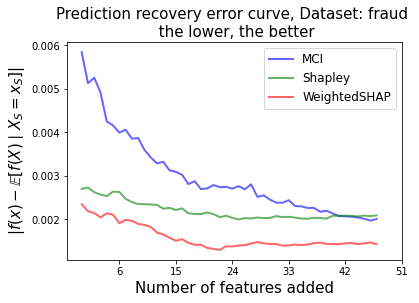

In [6]:
n_features=len(recovery_curve_keep_absolute[0])
n_display_features=int(n_features*0.6)

plt.plot(recovery_curve_keep_absolute[0][max(1,int(n_features*0.075)):n_display_features],
         label='MCI', color='blue', linewidth=2, alpha=0.6)
plt.plot(recovery_curve_keep_absolute[1][max(1,int(n_features*0.075)):n_display_features],
         label='Shapley', color='green', linewidth=2, alpha=0.6)
plt.plot(recovery_curve_keep_absolute[2][max(1,int(n_features*0.075)):n_display_features],
         label='WeightedSHAP', color='red', linewidth=2, alpha=0.6)
plt.legend(fontsize=12)
xlabel_text='Number of features added' 
plt.title(f'Prediction recovery error curve, Dataset: fraud \n the lower, the better', fontsize=15)
plt.xticks(np.arange(n_features)[max(1,int(n_features*0.075)):n_display_features][::n_display_features//6],
               np.arange(n_features)[max(1,int(n_features*0.075)):n_display_features][::n_display_features//6])
plt.xlabel(xlabel_text, fontsize=15)
plt.ylabel(r'$|f(x)-\mathbb{E}[f(X) \mid X_S = x_S]|$', fontsize=15)
    